## Iris Dataset Clustering using k-Means and Classification using kNN

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
iris = load_iris()

features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

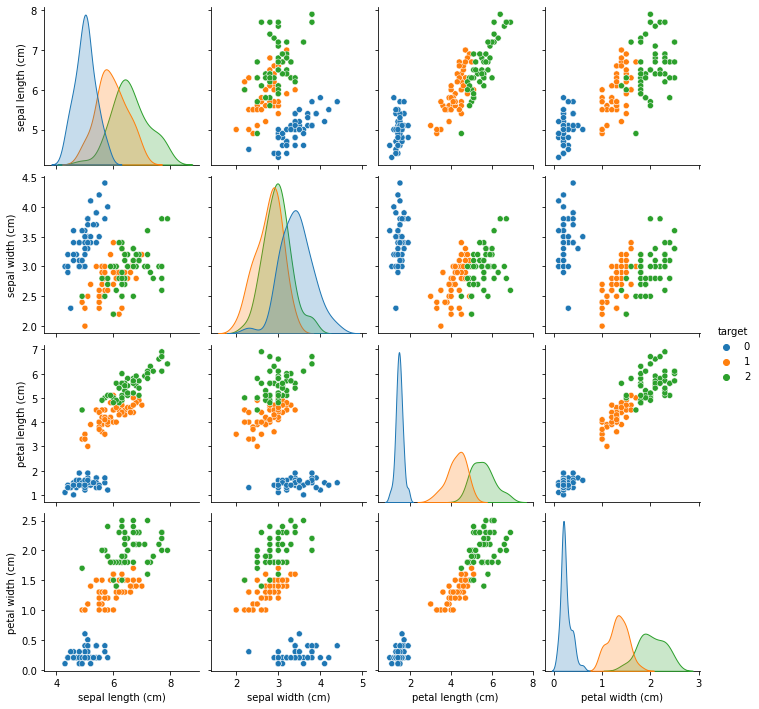

In [7]:
df_feature = pd.DataFrame(features, columns=feature_names)
df_target = pd.DataFrame(target, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [340]:
from scipy.special import logsumexp
from matplotlib import cm

def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    dist_embedded = np.einsum("ij,ij->i", diff_embedded, diff_embedded)
    dist_embedded[i] = np.inf

    # compute exponentiated distances (use the log-sum-exp trick to
    # avoid numerical instabilities
    exp_dist_embedded = np.exp(-dist_embedded - logsumexp(-dist_embedded))
    return exp_dist_embedded

def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(target[j]), linewidth=5 * thickness[j])

nca = NeighborhoodComponentsAnalysis(n_components=2, init='pca', random_state=0)
nca.fit(features, target)

plt.figure(2)
ax2 = plt.gca()
X_embedded = nca.transform(features)
relate_point(X_embedded, i, ax2)

for i in range(len(features)):
    ax2.text(X_embedded[i, 0], X_embedded[i, 1], str(i), va="center", ha="center")
    ax2.scatter(X_embedded[i, 0], X_embedded[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax2.set_title("NCA embedding")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axis("equal")
plt.show()

(123, 4)
(123,)
--------------------------------------------------
PC - Clustering Average Accuracy : 0.891667


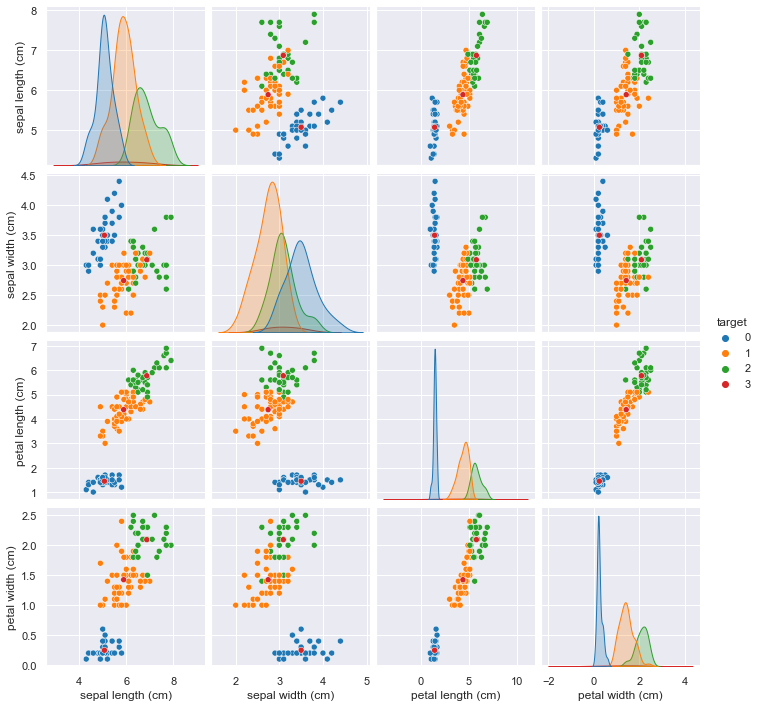

In [341]:
df_feature = pd.DataFrame(features_cluster, columns=feature_names)
df_target = pd.DataFrame(labels_cluster, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [342]:
comparison_acc = []
comparison_time = []

## kNN

In [343]:
# kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

PC - kNN Average Accuracy : 0.950000
PC - kNN Classification Time : 0.0063 sec


## NCM

In [344]:
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)
    
    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = nc.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

PC - kNN Average Accuracy : 0.926667
PC - kNN Classification Time : 0.0002 sec


## k-Means & kNN

In [345]:
# k-Means & kNN
avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 10

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")

PC - k-means & kNN Average Accuracy : 0.963333
PC - Clustering Time : 0.0335 sec
PC - Classification Time : 0.0074 sec
PC - Total Time : 0.0408 sec


## PCA Feature 3 & k-Means & kNN

In [346]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=3)
features = pca.fit(iris.data).transform(iris.data)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 10

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 3 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 3 & k-means & kNN Average Accuracy : 0.966667
PC - Clustering Time : 0.0435 sec
PC - Classification Time : 0.0088 sec
PC - Total Time : 0.0523 sec


## PCA Feature 2 & k-Means & kNN

In [347]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=2)
features = pca.fit(iris.data).transform(iris.data)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 10

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 2 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 2 & k-means & kNN Average Accuracy : 0.960000
PC - Clustering Time : 0.0327 sec
PC - Classification Time : 0.0071 sec
PC - Total Time : 0.0398 sec


## Method Comparison

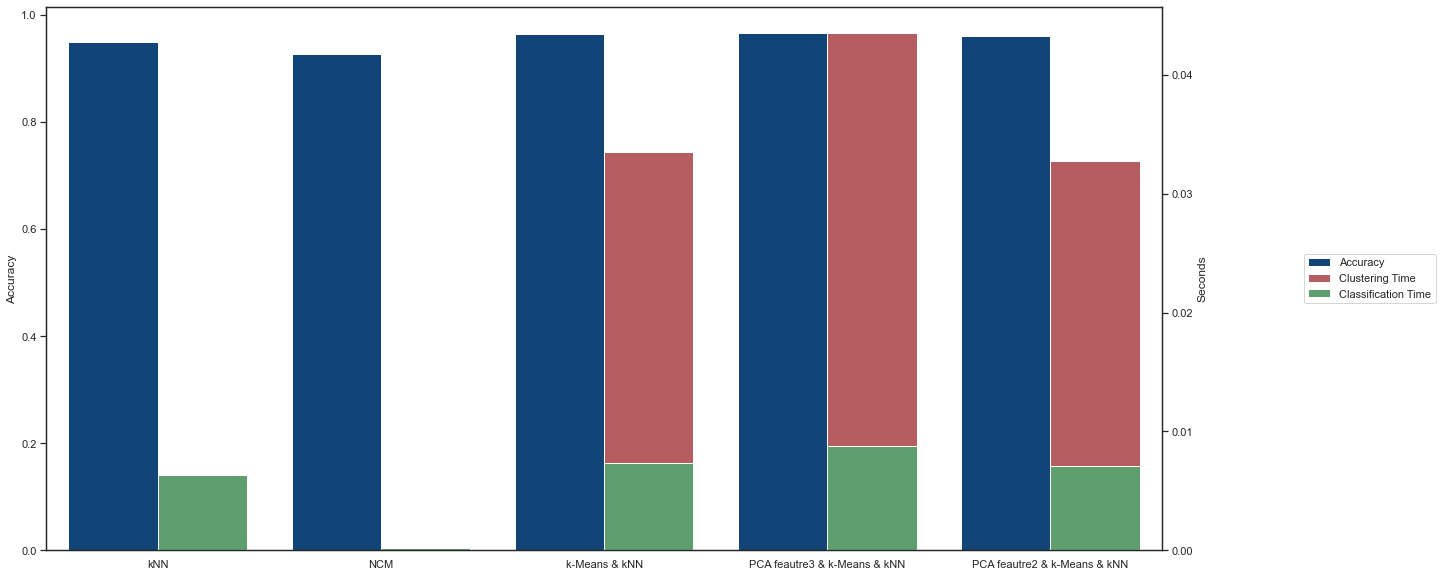

In [348]:
df_stack = pd.DataFrame(dict(
    score = [comparison_acc[0], comparison_acc[1], comparison_acc[2], comparison_acc[3], comparison_acc[4]],
    cluster = [0, 0, comparison_time[2], comparison_time[4], comparison_time[6]],
    # cluster = [0, 0, 0, 0, 0],
    classifier = [comparison_time[0], comparison_time[1], comparison_time[3], comparison_time[5], comparison_time[7]]
))

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"],
            y="score",
            data=df_stack,
            label="Accuracy",
            color='#004488',
            ax=ax1)

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="cluster",
            data=df_stack,
            label="Clustering Time",
            color='r',
            ax=ax2)

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="classifier",
            data=df_stack,
            label="Classification Time",
            color='g',
            ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

width_scale = 0.5

for bar in ax1.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

for bar_containers in ax2.containers:
    for bar in bar_containers:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

plt.legend(lines, labels, loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()
sns.set()